In [1]:
import csv

import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

from ipywidgets import interact
from functools import reduce

In [2]:
class Service():
    def __init__(self, service_ID, name, price):
        self.service_ID = service_ID
        self.name = name
        self.price = int(price)
    
    @property
    def service_ID(self):
        return self._service_ID
    @service_ID.setter
    def service_ID(self, value):
        self._service_ID = value
    
    @property
    def name(self):
        return self._name
    @name.setter
    def name(self, value):
        self._name = value
    
    @property
    def price(self):
        return self._price
    @price.setter
    def price(self, value):
        self._price = value
    
    def __str__(self):
        return f"Service ID = {self.service_ID}\nService Name = {self.name}\nService Price = {self.price}"

class User():
    def __init__(self, user_ID, first_name, last_name, surname, discount):
        self.user_ID = user_ID
        self.first_name = first_name
        self.last_name = last_name
        self.surname = surname
        self.discount = int(discount)

    @property
    def user_ID(self):
        return self._user_ID
    @user_ID.setter
    def user_ID(self, value):
        self._user_ID = value
    
    @property
    def first_name(self):
        return self._first_name
    @first_name.setter
    def first_name(self, value):
        self._first_name = value

    @property
    def last_name(self):
        return self._last_name
    @last_name.setter
    def last_name(self, value):
        self._last_name = value
    
    @property
    def surname(self):
        return self._surname
    @surname.setter
    def surname(self, value):
        self._surname = value
    
    @property
    def discount(self):
        return self._discount
    @discount.setter
    def discount(self, value):
        self._discount = value
    
    def __str__(self):
        return f"User ID = {self.user_ID}\nUser Name = {self.first_name} {self.last_name} {self.surname}\nUser Discount = {self.discount}"

class Training():
    def __init__(self, date, user_ID, service_ID, time):
        self.date = date
        self.user_ID = user_ID
        self.service_ID = service_ID
        self.time = int(time)
    
    @property
    def date(self):
        return self._date
    @date.setter
    def date(self, value):
        self._date = value

    @property
    def user_ID(self):
        return self._user_ID
    @user_ID.setter
    def user_ID(self, value):
        self._user_ID = value
    
    @property
    def service_ID(self):
        return self._service_ID
    @service_ID.setter
    def service_ID(self, value):
        self._service_ID = value
    
    @property
    def time(self):
        return self._time
    @time.setter
    def time(self, value):
        self._time = value
    
    def __str__(self):
        return f"Training Date = {self.date}\nService ID = {self.service_ID}\nUser ID = {self.user_ID}\nTraining Time = {self.time}"

In [3]:
services = []
with open('services.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        services.append(Service(*row))

users = []
with open('users.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        users.append(User(*row))

trainings = []
with open('training1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        trainings.append(Training(*row))
with open('training2.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        trainings.append(Training(*row))

In [4]:
user_data = [x.last_name + " " + x.first_name[0] + ". " + x.surname[0] for x in users]
def on_user_change(user):
    sum = 0
    for u in users:
        curr = u.last_name + " " + u.first_name[0] + ". " + u.surname[0]
        if curr == user:
            for s in services:
                for t in trainings:
                    if u.user_ID == t.user_ID and s.service_ID == t.service_ID:
                        sum += t.time * s.price - t.time * s.price * u.discount / 100
    print("Money that user paid = " + str(sum))

interact(on_user_change, user=user_data);

interactive(children=(Dropdown(description='user', options=('Last1 N. S', 'Last2 N. S', 'Last3 N. S', 'Last4 N…

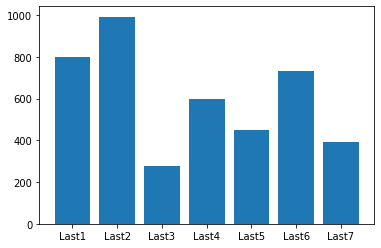

In [5]:
graph = {}
for u in users:
    sum = 0
    for s in services:
        for t in trainings:
            if u.user_ID == t.user_ID and s.service_ID == t.service_ID:
                sum += t.time * s.price - t.time * s.price * u.discount / 100
    graph[u.last_name] = sum

plt.bar(range(len(graph)), list(graph.values()));
plt.xticks(range(len(graph)), list(graph.keys()));
plt.show()

In [6]:
service_data = [x.name for x in services]
def on_service_change(service):
    sum = 0
    for s in services:
        if s.name == service:
            for t in trainings:
                if s.service_ID == t.service_ID:
                    sum += t.time
    print("Service had " + str(sum) + " hours in total")

interact(on_service_change, service=service_data);

interactive(children=(Dropdown(description='service', options=('Service1', 'Service2', 'Service3', 'Service4')…

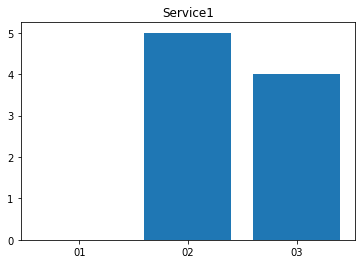

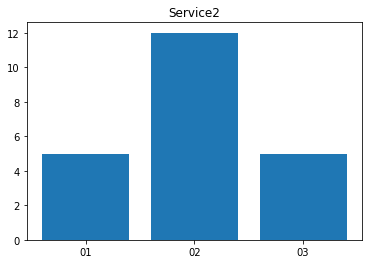

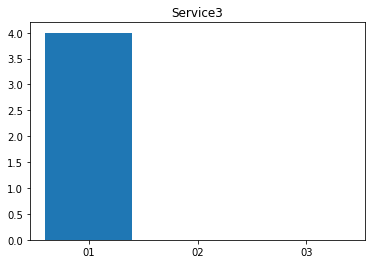

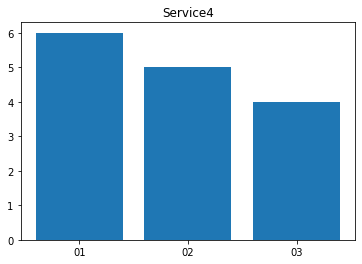

In [7]:
months = set([str(x.date[0] + x.date[1]) for x in trainings])

graph = {}
for s in services:
    for m in months:
        sum = 0
        for t in trainings:
            if t.date[0] + t.date[1] == m and s.service_ID == t.service_ID:
                sum += t.time
            graph[m] = sum

    plt.title(s.name)
    plt.bar(range(len(graph)), list(graph.values()));
    plt.xticks(range(len(graph)), list(graph.keys()));
    plt.show()

In [8]:
services = pd.read_csv("services.csv", names=["service_ID", "name", "price"])
users = pd.read_csv("users.csv", names=["user_ID", "first_name", "last_name", "surname", "discount"])

trainings1 = pd.read_csv("training1.csv", names=["date", "user_ID", "service_ID", "time"])
trainings2 = pd.read_csv("training2.csv", names=["date", "user_ID", "service_ID", "time"])

trainings = pd.concat([trainings1, trainings2])

In [9]:
data = pd.merge(services, trainings, on="service_ID", how="left").fillna(0)
data = pd.merge(data, users, on="user_ID", how="left").fillna(0)

display(data)

,service_ID,name,price,date,user_ID,time,first_name,last_name,surname,discount
0,1,Service1,100,2.01,2,4,Name2,Last2,Surname2,20
1,1,Service1,100,3.01,3,1,Name3,Last3,Surname3,40
2,1,Service1,100,2.01,5,1,Name5,Last5,Surname5,10
3,1,Service1,100,3.01,6,3,Name6,Last6,Surname6,15
4,2,Service2,120,2.01,2,5,Name2,Last2,Surname2,20
5,2,Service2,120,3.01,3,2,Name3,Last3,Surname3,40
6,2,Service2,120,1.01,1,3,Name1,Last1,Surname1,0
7,2,Service2,120,2.01,2,2,Name2,Last2,Surname2,20
8,2,Service2,120,3.01,3,1,Name3,Last3,Surname3,40
9,2,Service2,120,2.01,4,5,Name4,Last4,Surname4,35


In [10]:
names = set(data.at[i, "last_name"] for i in range(len(data.index)))

def on_name_change(Last_Name):
    copy = data.copy()
    copy = copy[copy.last_name == Last_Name]
    del copy["service_ID"], copy["price"], copy["date"], copy["user_ID"], copy["discount"]
    copy = copy.groupby(["name"]).sum()
    display(copy)
    copy.plot.bar()
interact(on_name_change, Last_Name=names);

interactive(children=(Dropdown(description='Last_Name', options=('Last4', 'Last2', 'Last5', 'Last1', 'Last6', …